<a href="https://colab.research.google.com/github/RinGoku/Kaggle-Titanic-ML/blob/master/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("train.csv").replace("male",0).replace("female",1)

客室のグレード

([array([ 80.,  97., 372.]), array([216., 184., 491.])],
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 Lists of Patches objects>)

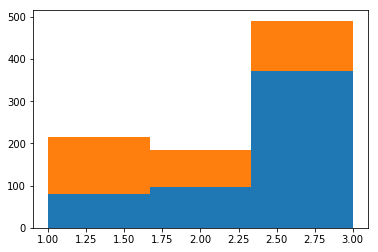

In [3]:
df["Age"].fillna(df.Age.median(), inplace=True)
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

年齢ヒストグラム

([array([ 13.,  13.,   8.,  63.,  80., 191.,  47.,  39.,  30.,  23.,  14.,
          11.,  10.,   3.,   4.,   0.]),
  array([ 44.,  20.,  19.,  96., 122., 285.,  88.,  67.,  47.,  39.,  24.,
          18.,  14.,   3.,   4.,   1.])],
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 2 Lists of Patches objects>)

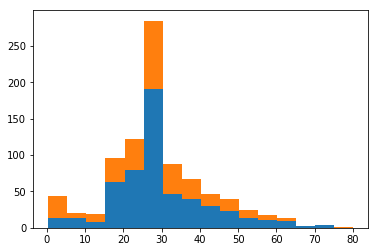

In [4]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

データ整形

In [0]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

学習

In [0]:
train_data = df2.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

# 学習
forest = forest.fit(xs, y)

test_df= pd.read_csv("test.csv").replace("male",0).replace("female",1)
# 欠損値の補完
test_df["Age"].fillna(df.Age.median(), inplace=True)
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [13]:
test_data = test_df2.values
xs_test = test_data[:, 1:]
output = forest.predict(xs_test)

print(len(test_data[:,0]), len(output))
zip_data = zip(test_data[:,0].astype(int), output.astype(int))
predict_data = list(zip_data)

418 418


In [0]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])